In [85]:
import yfinance as yf

Microsoft_stock = yf.Ticker("MSFT")
Microsoft_stock_hist = Microsoft_stock.history(period="max")

In [86]:
Microsoft_stock_hist.head(5) ## Microsoft stock data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055898,0.064119,0.055898,0.061378,1031788800,0.0,0.0
1986-03-14,0.061378,0.064667,0.061378,0.063570,308160000,0.0,0.0
1986-03-17,0.063570,0.065215,0.063570,0.064667,133171200,0.0,0.0
1986-03-18,0.064667,0.065215,0.062474,0.063022,67766400,0.0,0.0
1986-03-19,0.063022,0.063570,0.061378,0.061926,47894400,0.0,0.0


<AxesSubplot:xlabel='Date'>

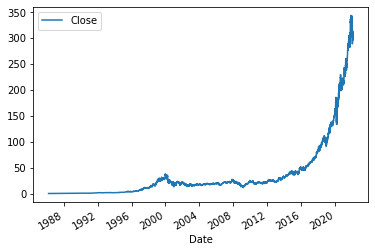

In [87]:
Microsoft_stock_hist.plot.line(y="Close",use_index=True)

In [88]:
data = Microsoft_stock_hist[["Close"]]
data = data.rename(columns = {'Close':'Actual_Close'})
data["Target"] = Microsoft_stock_hist.rolling(2).apply(lambda x: x.iloc[1]>x.iloc[0])["Close"]

In [89]:
data.head(5)

,Actual_Close,Target
Date,,
1986-03-13,0.061378,NaN
1986-03-14,0.063570,1.0
1986-03-17,0.064667,1.0
1986-03-18,0.063022,0.0
1986-03-19,0.061926,0.0


In [90]:
Microsoft_stock_hist_prev = Microsoft_stock_hist.copy()
Microsoft_stock_hist_prev = Microsoft_stock_hist_prev.shift(1)

In [91]:
predictors = ["Close", "High", "Low", "Open","Volume"]
data = data.join(Microsoft_stock_hist_prev[predictors]).iloc[1:]

In [92]:
data.head(5) # 1 the price went up, 0 the price went down

,Actual_Close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
1986-03-14,0.063570,1.0,0.061378,0.064119,0.055898,0.055898,1.031789e+09
1986-03-17,0.064667,1.0,0.063570,0.064667,0.061378,0.061378,3.081600e+08
1986-03-18,0.063022,0.0,0.064667,0.065215,0.063570,0.063570,1.331712e+08
1986-03-19,0.061926,0.0,0.063022,0.065215,0.062474,0.064667,6.776640e+07
1986-03-20,0.060282,0.0,0.061926,0.063570,0.061378,0.063022,4.789440e+07


In [93]:
!pip install scikit-learn

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
# min_samples_split = prevents overfitting so the model could be generalized and be good for the test data
# random_state = we'll get the same answers
model  = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

train = data.iloc[:-100] # last 100
test = data.iloc[-100:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [96]:
# We're trying to minimize our losses
# to minimize false positive - the precentage of days the price actually went up
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds

array([1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.])

In [97]:
import pandas as pd

preds = pd.Series(preds, index=test.index)
preds

Date
2021-09-27    1.0
2021-09-28    1.0
2021-09-29    1.0
2021-09-30    0.0
2021-10-01    1.0
             ... 
2022-02-10    0.0
2022-02-11    0.0
2022-02-14    0.0
2022-02-15    1.0
2022-02-16    1.0
Length: 100, dtype: float64

In [98]:
precision_score(test["Target"], preds)

0.5333333333333333

In [99]:
combined = pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)

<AxesSubplot:xlabel='Date'>

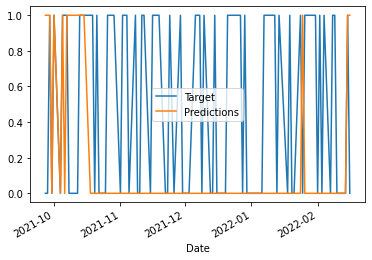

In [100]:
combined.plot()

In [101]:
test

,Actual_Close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
2021-09-27,293.632812,0.0,298.803345,299.252505,296.387751,297.685395,14999000.0
2021-09-28,283.002228,0.0,293.632812,295.928600,292.405048,295.599216,23571700.0
2021-09-29,283.481354,1.0,283.002228,290.248979,282.233645,289.270758,43186200.0
2021-09-30,281.405182,0.0,283.481354,286.246284,282.493171,284.579351,26353700.0
2021-10-01,288.572052,1.0,281.405182,287.304362,281.105711,285.188239,32325800.0
...,...,...,...,...,...,...,...
2022-02-10,302.380005,0.0,311.209991,311.929993,307.390015,309.869995,31284700.0
2022-02-11,295.040009,0.0,302.380005,309.119995,300.700012,304.040009,45386200.0
2022-02-14,295.000000,0.0,295.040009,304.290009,294.220001,303.190002,39143900.0


In [102]:
## Backtesting
## predict future data based on data in the past
## better than cross-validation to predict and generalize the model

start = 1000
step = 750
i = 1000

train = data.iloc[0:i].copy()
test = data.iloc[i:i+step].copy()

model.fit(train[predictors], train["Target"])

preds = model.predict_proba(test[predictors])
preds
# first column 1 - probability that price will go down (0)
# second column - probability that price will go up (1)

array([[0.37803882, 0.62196118],
       [0.34775225, 0.65224775],
       [0.42753771, 0.57246229],
       ...,
       [0.37499829, 0.62500171],
       [0.3694885 , 0.6305115 ],
       [0.43116603, 0.56883397]])

In [103]:
start = 1000
step = 750
i = 1000

train = data.iloc[0:i].copy()
test = data.iloc[i:i+step].copy()

model.fit(train[predictors], train["Target"])

preds = model.predict_proba(test[predictors])[:,1]
preds

# One demisional array of - probability that price will go up (1)

array([0.62196118, 0.65224775, 0.57246229, 0.62429293, 0.61912816,
       0.62429293, 0.62484881, 0.54656835, 0.63312438, 0.62429293,
       0.62586691, 0.63312438, 0.61595762, 0.63312438, 0.61937922,
       0.63175519, 0.62500171, 0.63196118, 0.62500171, 0.63222534,
       0.63222534, 0.63222534, 0.61912816, 0.6305115 , 0.5457993 ,
       0.63299567, 0.63312438, 0.62848793, 0.62076791, 0.63299567,
       0.5334947 , 0.59748904, 0.63196118, 0.56720834, 0.57436001,
       0.62076791, 0.62162135, 0.63146161, 0.60256567, 0.6305115 ,
       0.54656835, 0.63222534, 0.55587587, 0.63958667, 0.64017584,
       0.63222534, 0.5334947 , 0.59748904, 0.54656835, 0.62162135,
       0.64420553, 0.53958717, 0.64309442, 0.64309442, 0.55083613,
       0.63222534, 0.55514408, 0.58721736, 0.61912816, 0.60891195,
       0.60906873, 0.60906873, 0.60906873, 0.61912816, 0.6321172 ,
       0.6305115 , 0.63196118, 0.63196118, 0.63146161, 0.62848793,
       0.63312438, 0.63170654, 0.6305115 , 0.63146161, 0.55587

In [107]:
start = 1000
step = 750 # step=100 will get us better predictions, the 750 is just faster
i = 1000

train = data.iloc[0:i].copy()
test = data.iloc[i:i+step].copy()

model.fit(train[predictors], train["Target"])

preds = model.predict_proba(test[predictors])[:,1]
# This step is for the combined later step
#  prediction by default is a numpy array, and we cannot concat numpy array with panda series
preds = pd.Series(preds, index=test.index) 
preds[preds > 0.6] = 1 # by default it's 0.5 and we're setting 0.6 as a higher confidence threshold
preds[preds <=0.6] = 0

combined = pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)

combined

,Target,Predictions
Date,,
1990-02-27,0.0,1.0
1990-02-28,1.0,1.0
1990-03-01,1.0,0.0
1990-03-02,1.0,1.0
1990-03-05,1.0,1.0
...,...,...
1993-02-05,1.0,1.0
1993-02-08,0.0,1.0
1993-02-09,0.0,1.0


In [112]:
start = 1000
step = 750 # step=100 will get us better predictions, the 750 is just faster

predictions = []
for i in range (start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:i+step].copy()

    model.fit(train[predictors], train["Target"])

    preds = model.predict_proba(test[predictors])[:,1]
    # This step is for the combined later step
    #  prediction by default is a numpy array, and we cannot concat numpy array with panda series
    preds = pd.Series(preds, index=test.index) 
    preds[preds > 0.6] = 1 # by default it's 0.5 and we're setting 0.6 as a higher confidence threshold
    preds[preds <=0.6] = 0

    combined = pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)

    predictions.append(combined)

predictions = pd.concat(predictions)


In [113]:
predictions["Predictions"].value_counts()

0.0    7391
1.0     666
Name: Predictions, dtype: int64

In [116]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5045045045045045

In [117]:
start = 1000
step = 750 # step=100 will get us better predictions, the 750 is just faster

def Backtest(data, model, predictors, start=1000, step=750):

    predictions = []
    for i in range (start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()

        model.fit(train[predictors], train["Target"])

        preds = model.predict_proba(test[predictors])[:,1]
        # This step is for the combined later step
        #  prediction by default is a numpy array, and we cannot concat numpy array with panda series
        preds = pd.Series(preds, index=test.index) 
        preds[preds > 0.6] = 1 # by default it's 0.5 and we're setting 0.6 as a higher confidence threshold
        preds[preds <=0.6] = 0

        combined = pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)

        predictions.append(combined)

    predictions = pd.concat(predictions)
    return predictions

In [ ]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()

weekly_trend = data.shift